In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# ① 시스템에 설치된 한글 폰트 중 하나 선택 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
# plt.rcParams['font.family'] = 'NanumGothic'  # 나눔폰트 설치 시

# ② 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 혼잡도 파일 결측치 처리

In [16]:
import pandas as pd

# 파일 경로 (로컬에 맞게 수정)
file_path = "data/혼잡도_2022_통합.csv"

# 인코딩 처리 포함한 불러오기
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='cp949')

# datetime 컬럼이 있다면 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# hour 컬럼이 없다면 생성
if 'hour' not in df.columns:
    df['hour'] = df['datetime'].dt.hour

# 미리보기
df.head()

,tm,line,station_number,name,direction,stn,TMP,wd,WSD,rn_day,PCP,REH,si,ta_chi,congestion,year,month,day,hour,datetime
0,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,0.0,34.0,-99.0,-12.8,0,2022,1,1,0,2022-01-01 00:00:00
1,2022010101,1,150,서울역,상선,419,-9.4,39.4,2.0,0.0,0.0,35.8,-99.0,-10.4,0,2022,1,1,1,2022-01-01 00:01:00
2,2022010105,1,150,서울역,상선,419,-9.7,350.9,0.9,0.0,0.0,44.5,-99.0,-10.8,2,2022,1,1,5,2022-01-01 00:05:00
3,2022010106,1,150,서울역,상선,419,-9.4,139.6,0.5,0.0,0.0,43.4,-99.0,-11.0,5,2022,1,1,6,2022-01-01 00:06:00
4,2022010107,1,150,서울역,상선,419,-10.1,173.6,2.7,0.0,0.0,49.2,-99.0,-10.9,4,2022,1,1,7,2022-01-01 00:07:00


In [17]:
df_original = df.copy() # 보간 전 복사

In [44]:
df=df_original.copy()

### TMP

In [45]:
# TMP가 결측치인 행 필터링
tmp_na_df = df[df['TMP'].isna()].copy()

# 날짜만 따로 컬럼으로 분리
tmp_na_df['date'] = tmp_na_df['datetime'].dt.date

# 날짜 기준으로 정렬
tmp_na_df = tmp_na_df.sort_values('datetime')

# 결과 확인
tmp_na_df

,tm,line,station_number,name,direction,stn,TMP,wd,WSD,rn_day,...,REH,si,ta_chi,congestion,year,month,day,hour,datetime,date
65633,2022010611,1,1907,가능,상선,431,NaN,-99.0,NaN,-99.0,...,NaN,1.34,-0.1,13,2022,1,6,11,2022-01-06 01:01:00,2022-01-06
66263,2022010611,1,1907,가능,하선,431,NaN,-99.0,NaN,-99.0,...,NaN,1.34,-0.1,23,2022,1,6,11,2022-01-06 01:01:00,2022-01-06
308912,2022011105,5,2565,하남시청,상선,444,NaN,-99.0,NaN,-99.0,...,NaN,-99.00,-9.2,9,2022,1,11,5,2022-01-11 00:05:00,2022-01-11
309542,2022011105,5,2565,하남시청,하선,444,NaN,-99.0,NaN,-99.0,...,NaN,-99.00,-9.2,0,2022,1,11,5,2022-01-11 00:05:00,2022-01-11
310172,2022011105,5,2566,하남검단산,상선,444,NaN,-99.0,NaN,-99.0,...,NaN,-99.00,-9.2,5,2022,1,11,5,2022-01-11 00:05:00,2022-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038185,2022120417,1,1911,덕정,하선,372,NaN,-99.0,NaN,-99.0,...,NaN,0.16,-2.6,22,2022,12,4,17,2022-12-04 01:07:00,2022-12-04
5038196,2022120507,1,1911,덕정,하선,372,NaN,-99.0,NaN,-99.0,...,NaN,-99.00,-8.6,21,2022,12,5,7,2022-12-05 00:07:00,2022-12-05
5037608,2022120507,1,1911,덕정,상선,372,NaN,-99.0,NaN,-99.0,...,NaN,-99.00,-8.6,7,2022,12,5,7,2022-12-05 00:07:00,2022-12-05
5037611,2022120510,1,1911,덕정,상선,372,NaN,-99.0,NaN,-99.0,...,36.8,1.06,-4.8,10,2022,12,5,10,2022-12-05 01:00:00,2022-12-05


In [47]:
def interpolate_TMP_partial_only(df):
    import numpy as np

    # 복사 후 전처리
    df = df.copy()
    df['TMP'] = pd.to_numeric(df['TMP'], errors='coerce')
    df['TMP'] = df['TMP'].replace(-99.0, np.nan)

    # datetime 인덱스 설정
    df = df.set_index('datetime').sort_index()

    # 결측치 시점만 추출
    na_times = df[df['TMP'].isna()].index
    updated = []

    for time in na_times:
        prev_time = time - pd.Timedelta(hours=1)
        next_time = time + pd.Timedelta(hours=1)

        if prev_time in df.index and next_time in df.index:
            prev_val = df.loc[prev_time, 'TMP']
            next_val = df.loc[next_time, 'TMP']

            if isinstance(prev_val, pd.Series):
                prev_val = prev_val.values[0]
            if isinstance(next_val, pd.Series):
                next_val = next_val.values[0]

            if pd.notna(prev_val) and pd.notna(next_val):
                interp_val = (prev_val + next_val) / 2
                df.at[time, 'TMP'] = interp_val  # <- 오직 이 조건만 보간

    return df.reset_index()

In [79]:
df_tmp_cleaned = interpolate_TMP_partial_only(df)

In [80]:
df_tmp_cleaned

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,rn_day,PCP,REH,si,ta_chi,congestion,year,month,day,hour
0,2022-01-01 00:00:00,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,0.0,0.0,34.0,-99.0,-12.8,0,2022,1,1,0
1,2022-01-01 00:00:00,2022010100,6,2642,월곡,하선,408,-7.2,293.0,0.9,0.0,0.0,29.7,-99.0,-7.4,0,2022,1,1,0
2,2022-01-01 00:00:00,2022010100,1,1821,온수,상선,423,-7.9,337.3,2.1,0.0,0.0,42.4,-99.0,-10.8,0,2022,1,1,0
3,2022-01-01 00:00:00,2022010100,6,2643,상월곡,상선,408,-7.2,293.0,0.9,0.0,0.0,29.7,-99.0,-7.4,0,2022,1,1,0
4,2022-01-01 00:00:00,2022010100,6,2643,상월곡,하선,408,-7.2,293.0,0.9,0.0,0.0,29.7,-99.0,-7.4,0,2022,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396195,2022-12-31 02:03:00,2022123123,7,2742,장승배기,상선,418,2.3,213.5,1.3,0.0,0.0,59.2,-99.0,0.1,10,2022,12,31,23
5396196,2022-12-31 02:03:00,2022123123,3,328,잠원,하선,415,-1.6,14.6,0.4,0.0,0.0,71.2,-99.0,-0.7,19,2022,12,31,23
5396197,2022-12-31 02:03:00,2022123123,3,329,고속터미널,상선,889,-3.0,247.6,0.3,0.0,0.0,95.5,-99.0,-0.1,14,2022,12,31,23
5396198,2022-12-31 02:03:00,2022123123,4,1454,정부과천청사,상선,590,-2.2,173.8,1.9,0.0,0.0,80.8,-99.0,-1.4,17,2022,12,31,23


In [81]:
# TMP가 결측치인 행 필터링
tmp_na_df = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].copy()

# 날짜만 따로 컬럼으로 분리
tmp_na_df['date'] = tmp_na_df['datetime'].dt.date

# 날짜 기준으로 정렬
tmp_na_df = tmp_na_df.sort_values('datetime')

# 결과 확인
tmp_na_df

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
151818,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,상선,444,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-9.2,5,2022,1,11,5,2022-01-11
151955,2022-01-11 00:05:00,2022011105,5,2565,하남시청,하선,444,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-9.2,0,2022,1,11,5,2022-01-11
152254,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,하선,444,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-9.2,0,2022,1,11,5,2022-01-11
152302,2022-01-11 00:05:00,2022011105,5,2565,하남시청,상선,444,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-9.2,9,2022,1,11,5,2022-01-11
165281,2022-01-11 02:03:00,2022011123,3,1952,화정,하선,450,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-10.4,1,2022,1,11,23,2022-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5025684,2022-12-04 01:04:00,2022120414,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,NaN,NaN,1.00,-1.8,14,2022,12,4,14,2022-12-04
5027613,2022-12-04 01:07:00,2022120417,1,1911,덕정,하선,372,NaN,-99.0,NaN,...,NaN,NaN,0.16,-2.6,22,2022,12,4,17,2022-12-04
5027699,2022-12-04 01:07:00,2022120417,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,NaN,NaN,0.16,-2.6,24,2022,12,4,17,2022-12-04
5035526,2022-12-05 00:07:00,2022120507,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,NaN,NaN,-99.00,-8.6,7,2022,12,5,7,2022-12-05


In [ ]:
df_tmp_cleaned_2 = df_tmp_cleaned.copy() # 보간 전 복사

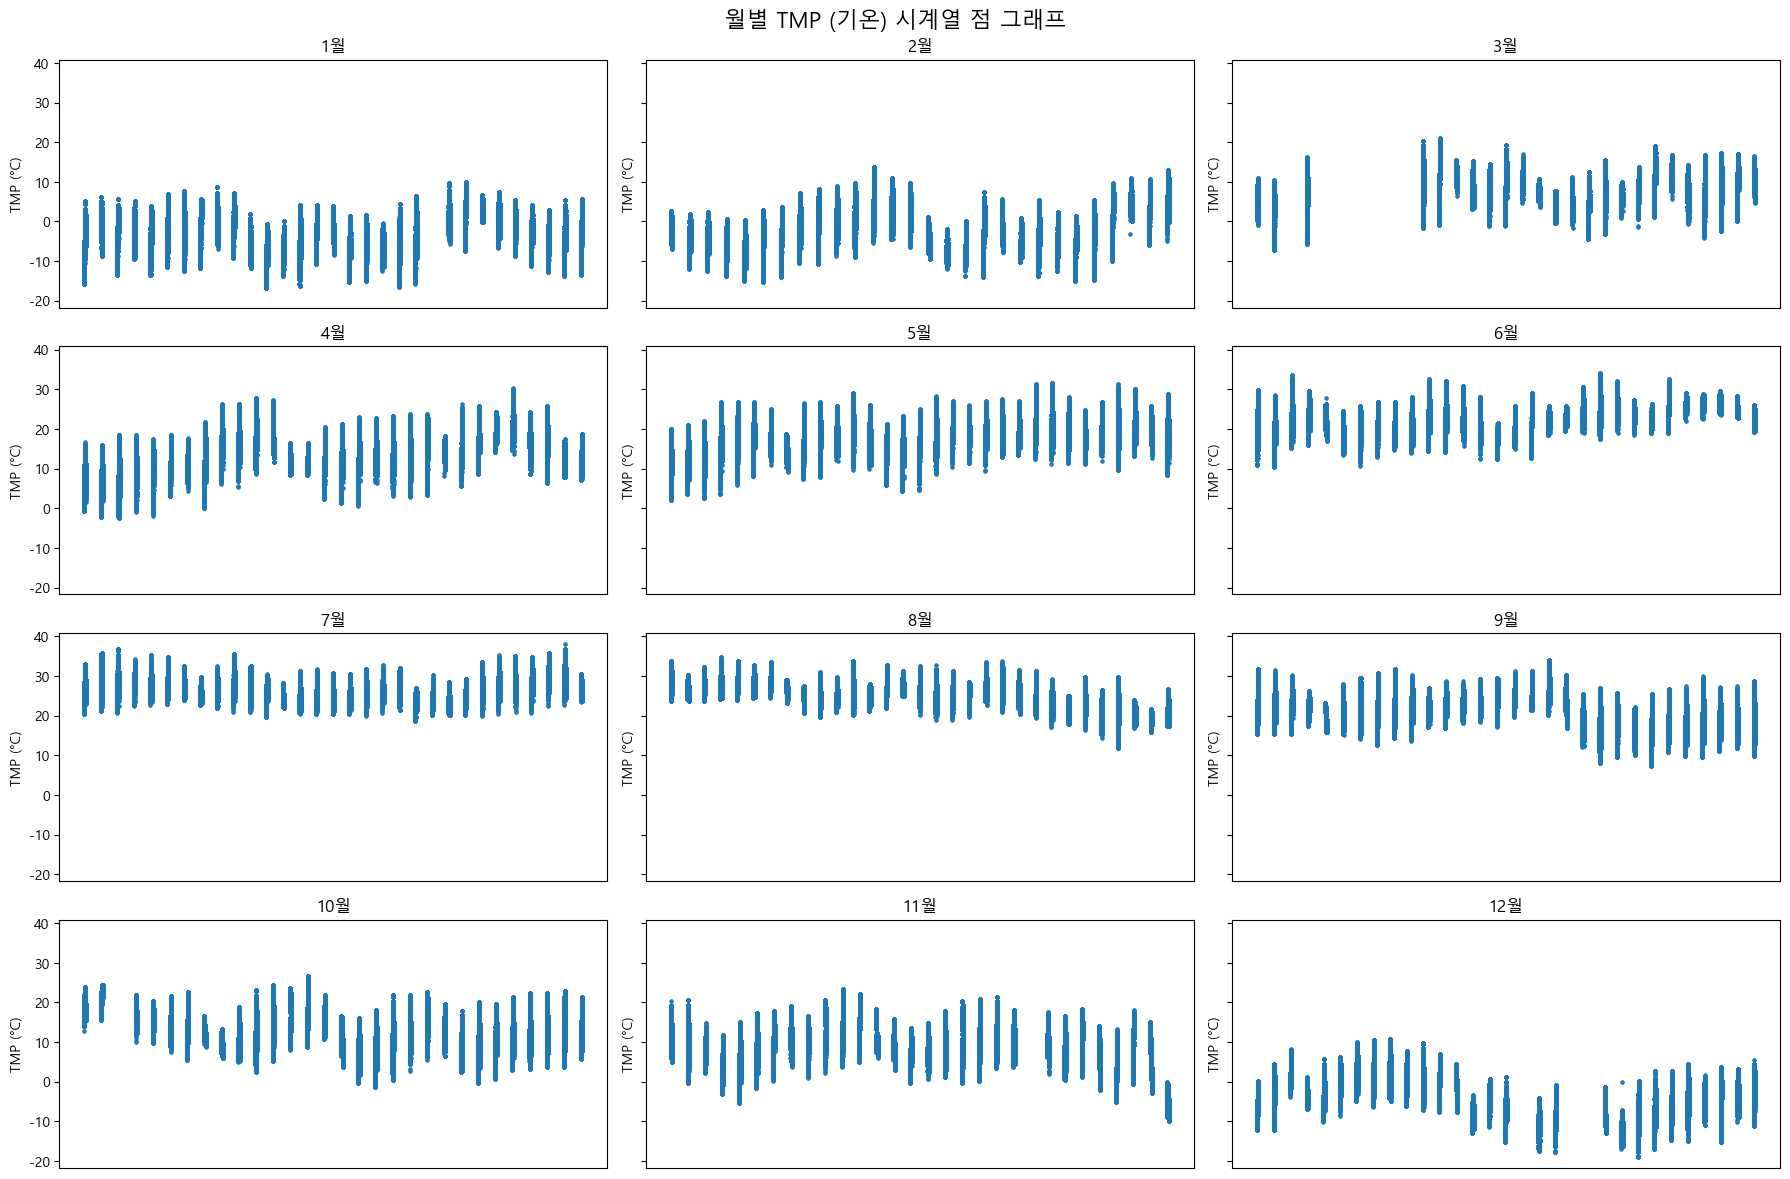

In [64]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# datetime 및 month 컬럼 생성
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])
df_tmp_cleaned['month'] = df_tmp_cleaned['datetime'].dt.month

# 서브플롯 생성
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12), sharey=True)
axes = axes.flatten()

# 월별 TMP 그래프 (정렬 포함)
for month in range(1, 13):
    ax = axes[month - 1]
    month_df = df_tmp_cleaned[df_tmp_cleaned['month'] == month].sort_values('datetime')
    ax.plot(month_df['datetime'], month_df['TMP'], marker='o', linestyle='None', markersize=2)
    ax.set_title(f"{month}월")
    ax.set_xticks([])
    ax.set_ylabel("TMP (°C)")

plt.suptitle("월별 TMP (기온) 시계열 점 그래프", fontsize=16)
plt.tight_layout()
plt.show()


# 관측치 data 가져오기

In [61]:
import pandas as pd

# 정확한 파일 경로 지정
file_path = "data/metro_observe_2022_2024/지하철역_관측데이터_2022.csv"

# CSV 불러오기 (인코딩 자동 처리)
try:
    obs_df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    obs_df = pd.read_csv(file_path, encoding='cp949')

# 데이터 미리보기
print("✅ 관측 데이터 로드 완료")
display(obs_df.head())

✅ 관측 데이터 로드 완료


,name,point_x,point_y,routeType_id,nx,ny,stn_id,stn_name,datetime,TMP,WSD,PCP,REH
0,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-01-01 00:00:00,-6.5,1.3,0.0,31.0
1,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 01:00:00,1.3,3.1,0.0,71.0
2,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 02:00:00,0.7,1.9,0.0,59.0
3,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 03:00:00,0.7,1.4,0.0,55.0
4,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 04:00:00,-1.4,1.3,0.0,89.0


In [155]:
df_tmp_cleaned

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
0,2022-01-01 00:00:00,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,...,0.0,34.0,-99.0,-12.8,0,2022,1,1,0,2022-01-01
1,2022-01-01 00:00:00,2022010100,6,2642,월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
2,2022-01-01 00:00:00,2022010100,1,1821,온수,상선,423,-7.9,337.3,2.1,...,0.0,42.4,-99.0,-10.8,0,2022,1,1,0,2022-01-01
3,2022-01-01 00:00:00,2022010100,6,2643,상월곡,상선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
4,2022-01-01 00:00:00,2022010100,6,2643,상월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396195,2022-12-31 02:03:00,2022123123,7,2742,장승배기,상선,418,2.3,213.5,1.3,...,0.0,59.2,-99.0,0.1,10,2022,12,31,2,2022-12-31
5396196,2022-12-31 02:03:00,2022123123,3,328,잠원,하선,415,-1.6,14.6,0.4,...,0.0,71.2,-99.0,-0.7,19,2022,12,31,2,2022-12-31
5396197,2022-12-31 02:03:00,2022123123,3,329,고속터미널,상선,889,-3.0,247.6,0.3,...,0.0,95.5,-99.0,-0.1,14,2022,12,31,2,2022-12-31
5396198,2022-12-31 02:03:00,2022123123,4,1454,정부과천청사,상선,590,-2.2,173.8,1.9,...,0.0,80.8,-99.0,-1.4,17,2022,12,31,2,2022-12-31


In [66]:
obs_df_original = obs_df.copy()

In [154]:
# TMP가 결측인 행 필터링
missing_tmp_df = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

# 결과 미리보기
print(f"✅ TMP 결측치 행 수: {len(missing_tmp_df)}")
missing_tmp_df.head()

# 날짜 별
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['datetime'].dt.date.value_counts().sort_index()

✅ TMP 결측치 행 수: 33776


datetime
2022-01-11     18
2022-01-12      8
2022-01-13      2
2022-01-20    150
2022-01-26     32
             ... 
2022-11-30     42
2022-12-01     28
2022-12-03      4
2022-12-04      4
2022-12-05      2
Name: count, Length: 219, dtype: int64

In [85]:
# 역 별
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['stn'].value_counts()

stn
406    6972
435    2710
425    2688
369    2196
540    1980
649    1560
454    1560
451    1464
434    1404
450    1190
572     882
423     860
415     810
433     752
413     720
438     690
421     612
444     604
510     468
437     406
418     360
889     330
400     288
110     288
414     252
590     220
409     192
372     152
373     150
402     140
431     128
419     128
408     104
411      78
108      72
112      70
477      68
532      48
98       36
424      36
407      26
545      22
410      18
412      16
428       8
427       8
565       6
541       4
Name: count, dtype: int64

In [152]:
# 시간대별별
df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]['datetime'].dt.hour.value_counts().sort_index()

datetime
0    14332
1    12770
2     6674
Name: count, dtype: int64

In [87]:
# datetime 형식 보장
obs_df['datetime'] = pd.to_datetime(obs_df['datetime'])

# year / month / day / hour 컬럼 생성
obs_df['year'] = obs_df['datetime'].dt.year
obs_df['month'] = obs_df['datetime'].dt.month
obs_df['day'] = obs_df['datetime'].dt.day
obs_df['hour'] = obs_df['datetime'].dt.hour

In [88]:
obs_df

,name,point_x,point_y,routeType_id,nx,ny,stn_id,stn_name,datetime,TMP,WSD,PCP,REH,date,year,month,day,hour
0,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-01-01 00:00:00,-6.5,1.3,0.0,31.0,2022-01-01,2022,1,1,0
1,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 01:00:00,1.3,3.1,0.0,71.0,2022-02-01,2022,2,1,1
2,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 02:00:00,0.7,1.9,0.0,59.0,2022-02-01,2022,2,1,2
3,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 03:00:00,0.7,1.4,0.0,55.0,2022-02-01,2022,2,1,3
4,압구정로데오,127.040572,37.527394,116,61,126,400,강남,2022-02-01 04:00:00,-1.4,1.3,0.0,89.0,2022-02-01,2022,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268870,숭실대입구,126.953991,37.495861,7,59,125,889,현충원,2022-12-31 19:00:00,-3.0,0.6,0.0,90.0,2022-12-31,2022,12,31,19
5268871,숭실대입구,126.953991,37.495861,7,59,125,889,현충원,2022-12-31 20:00:00,-3.2,0.7,0.0,93.0,2022-12-31,2022,12,31,20
5268872,숭실대입구,126.953991,37.495861,7,59,125,889,현충원,2022-12-31 21:00:00,-3.9,0.9,0.0,95.0,2022-12-31,2022,12,31,21
5268873,숭실대입구,126.953991,37.495861,7,59,125,889,현충원,2022-12-31 22:00:00,-3.3,0.7,0.0,97.0,2022-12-31,2022,12,31,22


In [96]:
# TMP 결측치인 행 필터링
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

# 날짜, 역, 결측치 수량 집계
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')

# 컬럼명 변경 (가독성용)
na_summary = na_summary.rename(columns={'datetime': 'date', 'name': 'station_name'})

# 출력
print("✅ 날짜 / 역별 TMP 결측치 수량:")
print(na_summary)

✅ 날짜 / 역별 TMP 결측치 수량:
            date station_name  na_count
0     2022-01-11           대곡         2
1     2022-01-11           마두         2
2     2022-01-11           백석         2
3     2022-01-11           원당         2
4     2022-01-11          정발산         2
...          ...          ...       ...
2201  2022-12-01           수진         4
2202  2022-12-01           신흥         4
2203  2022-12-03           덕정         4
2204  2022-12-04           덕정         4
2205  2022-12-05           덕정         2

[2206 rows x 3 columns]


In [108]:
# 날짜+역별 20개 이상 결측치 필터링 (기존 코드)
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')
na_20plus = na_summary[na_summary['na_count'] >= 75]

# 리스트업: "날짜 - 역명" 문자열 형태
na_20plus_list = na_20plus.apply(lambda row: f"{row['datetime']} - {row['name']} ({row['na_count']}건)", axis=1).tolist()

# 출력
print("✅ 날짜+역별 TMP 결측치 75건 이상 조합 리스트:")
for item in na_20plus_list:
    print(item)

✅ 날짜+역별 TMP 결측치 75건 이상 조합 리스트:
2022-05-08 - 노원 (76건)
2022-05-08 - 도봉산 (76건)
2022-05-08 - 창동 (76건)
2022-06-04 - 노원 (76건)
2022-06-04 - 도봉산 (76건)
2022-06-04 - 창동 (76건)
2022-06-05 - 노원 (76건)
2022-06-05 - 도봉산 (76건)
2022-06-05 - 창동 (76건)
2022-06-06 - 노원 (76건)
2022-06-06 - 도봉산 (76건)
2022-06-06 - 창동 (76건)
2022-06-26 - 노원 (76건)
2022-06-26 - 도봉산 (76건)
2022-06-26 - 창동 (76건)
2022-08-09 - 사당 (76건)
2022-08-10 - 불광 (76건)
2022-08-10 - 사당 (76건)
2022-08-10 - 연신내 (76건)
2022-08-11 - 사당 (76건)
2022-08-12 - 사당 (76건)
2022-08-13 - 사당 (76건)
2022-08-14 - 사당 (76건)
2022-08-15 - 사당 (76건)
2022-08-16 - 사당 (76건)
2022-09-11 - 노원 (76건)
2022-09-11 - 도봉산 (76건)
2022-09-11 - 창동 (76건)
2022-09-12 - 노원 (76건)
2022-09-12 - 도봉산 (76건)
2022-09-12 - 창동 (76건)
2022-11-26 - 불광 (76건)
2022-11-26 - 연신내 (76건)


In [110]:
# 날짜+역별 20건 이상 필터링 (기존)
tmp_na = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]
na_summary = tmp_na.groupby([tmp_na['datetime'].dt.date, 'name']).size().reset_index(name='na_count')
na_20plus = na_summary[na_summary['na_count'] >= 70]

# 역별 출현 횟수 집계 (몇 날짜에서 20건 이상인지)
station_counts = na_20plus['name'].value_counts()

print("✅ 결측치 70건 이상 날짜 조합에서 가장 많은 역 TOP 10")
print(station_counts.head(10))

✅ 결측치 70건 이상 날짜 조합에서 가장 많은 역 TOP 10
name
사당     8
노원     7
도봉산    7
창동     7
불광     2
연신내    2
Name: count, dtype: int64


In [112]:
target_stations = ['사당']

# TMP 결측치 행 중 대상 역 필터링
tmp_na_target = df_tmp_cleaned[
    (df_tmp_cleaned['TMP'].isna()) &
    (df_tmp_cleaned['name'].isin(target_stations))
]

# 날짜별 결측치 개수 집계
date_counts = tmp_na_target.groupby(tmp_na_target['datetime'].dt.date).size().reset_index(name='na_count')

print("📅 날짜별 결측치 개수 (대상 역)")
print(date_counts)

📅 날짜별 결측치 개수 (대상 역)
      datetime  na_count
0   2022-06-30        52
1   2022-07-01        28
2   2022-08-03         8
3   2022-08-08        12
4   2022-08-09        76
5   2022-08-10        76
6   2022-08-11        76
7   2022-08-12        76
8   2022-08-13        76
9   2022-08-14        76
10  2022-08-15        76
11  2022-08-16        76
12  2022-08-17        28
13  2022-10-25        48
14  2022-10-26        44
15  2022-10-27         4
16  2022-11-07        36
17  2022-11-08        28


In [113]:
# 시간대 컬럼 생성 (없으면)
df_tmp_cleaned['hour'] = df_tmp_cleaned['datetime'].dt.hour

# 시간대별 결측치 개수 집계 (대상 역)
hour_counts = tmp_na_target.groupby('hour').size().reset_index(name='na_count')

print("⏰ 시간대별 결측치 개수 (대상 역)")
print(hour_counts)

⏰ 시간대별 결측치 개수 (대상 역)
    hour  na_count
0      0        48
1      1        48
2      5        48
3      6        52
4      7        56
5      8        48
6      9        48
7     11         4
8     12        44
9     13        44
10    14        44
11    15        48
12    16        44
13    17        44
14    18        44
15    19        44
16    20        44
17    21        48
18    22        48
19    23        48


In [114]:
# datetime이 datetime 타입인지 확인 및 변환
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])

# 조건 필터링
result = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'].dt.month == 8) &
    (df_tmp_cleaned['datetime'].dt.day == 9)
]

# 결과 출력
print(f"✅ 사당역 8월 9일 데이터 개수: {len(result)}")
result

✅ 사당역 8월 9일 데이터 개수: 84


,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
3271312,2022-08-09 00:00:00,2022080900,4,433,사당,상선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,28.5,2,2022,8,9,0,2022-08-09
3271334,2022-08-09 00:00:00,2022080900,2,226,사당,외선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,28.5,3,2022,8,9,0,2022-08-09
3271515,2022-08-09 00:00:00,2022080900,2,226,사당,내선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,28.5,8,2022,8,9,0,2022-08-09
3271809,2022-08-09 00:00:00,2022080900,4,433,사당,하선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,28.5,1,2022,8,9,0,2022-08-09
3272148,2022-08-09 00:01:00,2022080901,4,433,사당,하선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,28.4,0,2022,8,9,0,2022-08-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285976,2022-08-09 02:02:00,2022080922,2,226,사당,외선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,26.9,11,2022,8,9,2,2022-08-09
3286227,2022-08-09 02:03:00,2022080923,4,433,사당,하선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,25.3,7,2022,8,9,2,2022-08-09
3286300,2022-08-09 02:03:00,2022080923,2,226,사당,외선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,25.3,7,2022,8,9,2,2022-08-09
3286351,2022-08-09 02:03:00,2022080923,2,226,사당,내선,425,NaN,-99.0,NaN,...,NaN,NaN,-99.0,25.3,20,2022,8,9,2,2022-08-09


In [115]:
# datetime이 datetime 타입인지 확인 및 변환
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])

# 조건 필터링: 사당역, 8월 9일, TMP 값 존재
result = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'].dt.month == 8) &
    (df_tmp_cleaned['datetime'].dt.day == 9) &
    (df_tmp_cleaned['TMP'].notna())
]

# 결과 출력
print(f"✅ 사당역 8월 9일 TMP 존재 행 개수: {len(result)}")
result


✅ 사당역 8월 9일 TMP 존재 행 개수: 8


,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
3276597,2022-08-09 01:00:00,2022080910,2,226,사당,내선,425,25.6,-99.0,NaN,...,NaN,NaN,0.37,27.7,22,2022,8,9,1,2022-08-09
3276828,2022-08-09 01:00:00,2022080910,2,226,사당,외선,425,25.6,-99.0,NaN,...,NaN,NaN,0.37,27.7,71,2022,8,9,1,2022-08-09
3276966,2022-08-09 01:00:00,2022080910,4,433,사당,하선,425,25.6,-99.0,NaN,...,NaN,NaN,0.37,27.7,10,2022,8,9,1,2022-08-09
3277042,2022-08-09 01:00:00,2022080910,4,433,사당,상선,425,25.6,-99.0,NaN,...,NaN,NaN,0.37,27.7,20,2022,8,9,1,2022-08-09
3277234,2022-08-09 01:01:00,2022080911,4,433,사당,상선,425,24.5,-99.0,NaN,...,NaN,NaN,0.14,27.9,15,2022,8,9,1,2022-08-09
3277236,2022-08-09 01:01:00,2022080911,4,433,사당,하선,425,24.5,-99.0,NaN,...,NaN,NaN,0.14,27.9,11,2022,8,9,1,2022-08-09
3277658,2022-08-09 01:01:00,2022080911,2,226,사당,외선,425,24.5,-99.0,NaN,...,NaN,NaN,0.14,27.9,43,2022,8,9,1,2022-08-09
3277818,2022-08-09 01:01:00,2022080911,2,226,사당,내선,425,24.5,-99.0,NaN,...,NaN,NaN,0.14,27.9,22,2022,8,9,1,2022-08-09


사당 : 60, 125 / 기준 : 25 도 전/후 날씨 23도 - 28도

In [119]:
nxy_df = pd.read_csv("data/지하철역_nxy.csv")  # name, nx, ny 컬럼 포함되어야 함

In [129]:
nxy_df

,id,name,address,roadAddress,displayCode,displayName,city_id,city_name,point_x,point_y,routeType_id,routeType_name,transfers,nx,ny
0,100,소요산,경기도 동두천시 상봉암동 126-3,경기도 동두천시 평화로 2925,100,소요산역,1000,서울,127.061049,37.948747,1,1호선,NaN,61,135
1,70134,노포,부산광역시 금정구 노포동 133,부산광역시 금정구 중앙대로 2238,134,노포역,7000,부산,129.094817,35.283594,71,1호선,NaN,98,78
2,40146,안심,대구광역시 동구 괴전동 536-1,대구광역시 동구 안심로 455,146,안심역,4000,대구,128.733868,35.871249,41,1호선,NaN,91,91
3,50129,평동,광주광역시 광산구 월전동 51-23,광주광역시 광산구 평동로 870,119,평동역,5000,광주,126.769559,35.124754,51,1호선,NaN,57,74
4,30122,반석,대전광역시 유성구 반석동 685,대전광역시 유성구 북유성대로 303,122,반석역,3000,대전,127.314616,36.392128,31,1호선,NaN,66,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1411,아산,충청남도 아산시 배방읍 장재리 268,충청남도 아산시 배방읍 희망로 90,P172,아산역,1000,서울,127.104573,36.792118,1,1호선,NaN,62,110
1054,1412,탕정,충청남도 아산시 탕정면 매곡리 472-1,충청남도 아산시 탕정면 매곡중앙6로 11,P173,탕정역,1000,서울,127.084638,36.788270,1,1호선,NaN,62,110
1055,1413,배방,충청남도 아산시 배방읍 구령리 148-2,충청남도 아산시 배방읍 온천대로 1967,P174,배방역,1000,서울,127.052842,36.777592,1,1호선,NaN,61,110
1056,1415,온양온천,충청남도 아산시 온천동 56-9,충청남도 아산시 온천대로 1496,P176,온양온천역,1000,서울,127.003178,36.780541,1,1호선,NaN,60,110


In [149]:
df_tmp_cleaned

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
0,2022-01-01 00:00:00,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,...,0.0,34.0,-99.0,-12.8,0,2022,1,1,0,2022-01-01
1,2022-01-01 00:00:00,2022010100,6,2642,월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
2,2022-01-01 00:00:00,2022010100,1,1821,온수,상선,423,-7.9,337.3,2.1,...,0.0,42.4,-99.0,-10.8,0,2022,1,1,0,2022-01-01
3,2022-01-01 00:00:00,2022010100,6,2643,상월곡,상선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
4,2022-01-01 00:00:00,2022010100,6,2643,상월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396195,2022-12-31 02:03:00,2022123123,7,2742,장승배기,상선,418,2.3,213.5,1.3,...,0.0,59.2,-99.0,0.1,10,2022,12,31,2,2022-12-31
5396196,2022-12-31 02:03:00,2022123123,3,328,잠원,하선,415,-1.6,14.6,0.4,...,0.0,71.2,-99.0,-0.7,19,2022,12,31,2,2022-12-31
5396197,2022-12-31 02:03:00,2022123123,3,329,고속터미널,상선,889,-3.0,247.6,0.3,...,0.0,95.5,-99.0,-0.1,14,2022,12,31,2,2022-12-31
5396198,2022-12-31 02:03:00,2022123123,4,1454,정부과천청사,상선,590,-2.2,173.8,1.9,...,0.0,80.8,-99.0,-1.4,17,2022,12,31,2,2022-12-31


### 예보데이터 불러오기

In [126]:
import pandas as pd
import os
import glob

# 상위 디렉토리
base_dir = "data/daily_merged_forecast_2022_2024"
years = ['2022', '2023', '2024']

# 연도별 병합 및 저장
for year in years:
    year_dir = os.path.join(base_dir, year)
    file_paths = glob.glob(os.path.join(year_dir, "*.csv"))
    
    year_data = []

    for path in file_paths:
        try:
            df = pd.read_csv(path)

            # datetime 생성
            if {'년', '월', '일', '시각'}.issubset(df.columns):
                df['datetime'] = pd.to_datetime(
                    df[['년', '월', '일', '시각']].rename(
                        columns={'년': 'year', '월': 'month', '일': 'day', '시각': 'hour'}
                    )
                )

            # datetime이 포함된 전체 컬럼 유지
            if 'datetime' in df.columns and 'nx' in df.columns and 'ny' in df.columns:
                year_data.append(df)

        except Exception as e:
            print(f"⚠️ {year} 처리 실패: {path} → {e}")

    # 연도별 저장
    if year_data:
        df_year = pd.concat(year_data, ignore_index=True).drop_duplicates()
        df_year = df_year.sort_values(['datetime', 'nx', 'ny']).reset_index(drop=True)
        output_path = f"정제_예보_{year}.csv"
        df_year.to_csv(output_path, index=False, encoding='utf-8-sig')
        print(f"✅ {year} 저장 완료: {output_path} ({len(df_year):,}행)")


✅ 2022 저장 완료: 정제_예보_2022.csv (843,013행)
✅ 2023 저장 완료: 정제_예보_2023.csv (793,594행)
✅ 2024 저장 완료: 정제_예보_2024.csv (846,192행)


In [127]:
df_tmp_cleaned['datetime'] = pd.to_datetime(df_tmp_cleaned['datetime'])
forecast_2022 = pd.read_csv("정제_예보_2022.csv", parse_dates=['datetime'])
forecast_2023 = pd.read_csv("정제_예보_2023.csv", parse_dates=['datetime'])
forecast_2024 = pd.read_csv("정제_예보_2024.csv", parse_dates=['datetime'])

forecast_df = pd.concat([forecast_2022, forecast_2023, forecast_2024], ignore_index=True)

In [128]:
forecast_2023

,nx,ny,PCP,POP,PTY,REH,SKY,TMP,WSD,년,월,일,시각,datetime
0,50,119,-99.0,-99.0,0.0,-99.0,1.0,-99.0,4.5,2023,1,1,2,2023-01-01 02:00:00
1,50,120,-99.0,-99.0,0.0,-99.0,1.0,-99.0,7.0,2023,1,1,2,2023-01-01 02:00:00
2,50,121,-99.0,-99.0,0.0,-99.0,1.0,-99.0,9.4,2023,1,1,2,2023-01-01 02:00:00
3,50,122,-99.0,-99.0,0.0,-99.0,1.0,-99.0,10.0,2023,1,1,2,2023-01-01 02:00:00
4,50,123,-99.0,-99.0,0.0,-99.0,1.0,-99.0,10.8,2023,1,1,2,2023-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793589,66,131,-99.0,-99.0,0.0,-99.0,4.0,-99.0,12.7,2023,12,31,23,2023-12-31 23:00:00
793590,66,132,-99.0,-99.0,0.0,-99.0,4.0,-99.0,12.7,2023,12,31,23,2023-12-31 23:00:00
793591,66,133,-99.0,-99.0,0.0,-99.0,4.0,-99.0,12.6,2023,12,31,23,2023-12-31 23:00:00
793592,66,134,-99.0,-99.0,0.0,-99.0,4.0,-99.0,12.6,2023,12,31,23,2023-12-31 23:00:00


In [136]:
nxy_df

,id,name,address,roadAddress,displayCode,displayName,city_id,city_name,point_x,point_y,routeType_id,routeType_name,transfers,nx,ny
0,100,소요산,경기도 동두천시 상봉암동 126-3,경기도 동두천시 평화로 2925,100,소요산역,1000,서울,127.061049,37.948747,1,1호선,NaN,61,135
1,70134,노포,부산광역시 금정구 노포동 133,부산광역시 금정구 중앙대로 2238,134,노포역,7000,부산,129.094817,35.283594,71,1호선,NaN,98,78
2,40146,안심,대구광역시 동구 괴전동 536-1,대구광역시 동구 안심로 455,146,안심역,4000,대구,128.733868,35.871249,41,1호선,NaN,91,91
3,50129,평동,광주광역시 광산구 월전동 51-23,광주광역시 광산구 평동로 870,119,평동역,5000,광주,126.769559,35.124754,51,1호선,NaN,57,74
4,30122,반석,대전광역시 유성구 반석동 685,대전광역시 유성구 북유성대로 303,122,반석역,3000,대전,127.314616,36.392128,31,1호선,NaN,66,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,1411,아산,충청남도 아산시 배방읍 장재리 268,충청남도 아산시 배방읍 희망로 90,P172,아산역,1000,서울,127.104573,36.792118,1,1호선,NaN,62,110
1054,1412,탕정,충청남도 아산시 탕정면 매곡리 472-1,충청남도 아산시 탕정면 매곡중앙6로 11,P173,탕정역,1000,서울,127.084638,36.788270,1,1호선,NaN,62,110
1055,1413,배방,충청남도 아산시 배방읍 구령리 148-2,충청남도 아산시 배방읍 온천대로 1967,P174,배방역,1000,서울,127.052842,36.777592,1,1호선,NaN,61,110
1056,1415,온양온천,충청남도 아산시 온천동 56-9,충청남도 아산시 온천대로 1496,P176,온양온천역,1000,서울,127.003178,36.780541,1,1호선,NaN,60,110


In [158]:
na_rows = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].copy()
print(na_rows.columns.tolist())

['datetime', 'tm', 'line', 'station_number', 'name', 'direction', 'stn', 'TMP', 'wd', 'WSD', 'rn_day', 'PCP', 'REH', 'si', 'ta_chi', 'congestion', 'year', 'month', 'day', 'hour', 'date']


In [159]:
na_rows = na_rows.drop(columns=['nx', 'ny'], errors='ignore')
na_rows = na_rows.merge(nxy_df[['name', 'nx', 'ny']], on='name', how='left')
na_rows

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,si,ta_chi,congestion,year,month,day,hour,date,nx,ny
0,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,상선,444,NaN,-99.0,NaN,...,-99.00,-9.2,5,2022,1,11,0,2022-01-11,64.0,126.0
1,2022-01-11 00:05:00,2022011105,5,2565,하남시청,하선,444,NaN,-99.0,NaN,...,-99.00,-9.2,0,2022,1,11,0,2022-01-11,64.0,126.0
2,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,하선,444,NaN,-99.0,NaN,...,-99.00,-9.2,0,2022,1,11,0,2022-01-11,64.0,126.0
3,2022-01-11 00:05:00,2022011105,5,2565,하남시청,상선,444,NaN,-99.0,NaN,...,-99.00,-9.2,9,2022,1,11,0,2022-01-11,64.0,126.0
4,2022-01-11 02:03:00,2022011123,3,1956,정발산,하선,450,NaN,-99.0,NaN,...,-99.00,-10.4,1,2022,1,11,2,2022-01-11,56.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46927,2022-12-04 01:04:00,2022120414,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,1.00,-1.8,14,2022,12,4,1,2022-12-04,61.0,133.0
46928,2022-12-04 01:07:00,2022120417,1,1911,덕정,하선,372,NaN,-99.0,NaN,...,0.16,-2.6,22,2022,12,4,1,2022-12-04,61.0,133.0
46929,2022-12-04 01:07:00,2022120417,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,0.16,-2.6,24,2022,12,4,1,2022-12-04,61.0,133.0
46930,2022-12-05 00:07:00,2022120507,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,-99.00,-8.6,7,2022,12,5,0,2022-12-05,61.0,133.0


In [160]:
print(na_rows.head())
print(len(na_rows))

             datetime          tm  line  station_number   name direction  stn  \
0 2022-01-11 00:05:00  2022011105     5            2566  하남검단산        상선  444   
1 2022-01-11 00:05:00  2022011105     5            2565   하남시청        하선  444   
2 2022-01-11 00:05:00  2022011105     5            2566  하남검단산        하선  444   
3 2022-01-11 00:05:00  2022011105     5            2565   하남시청        상선  444   
4 2022-01-11 02:03:00  2022011123     3            1956    정발산        하선  450   

   TMP    wd  WSD  ...    si  ta_chi  congestion  year  month  day  hour  \
0  NaN -99.0  NaN  ... -99.0    -9.2           5  2022      1   11     0   
1  NaN -99.0  NaN  ... -99.0    -9.2           0  2022      1   11     0   
2  NaN -99.0  NaN  ... -99.0    -9.2           0  2022      1   11     0   
3  NaN -99.0  NaN  ... -99.0    -9.2           9  2022      1   11     0   
4  NaN -99.0  NaN  ... -99.0   -10.4           1  2022      1   11     2   

         date    nx     ny  
0  2022-01-11  64.0  126.0 

In [162]:
# 확인하고 싶은 값 예시
dt = pd.to_datetime("2022-08-09 02:00:00")
x = 60
y = 127

# 조회
result = forecast_2022[
    (forecast_2022['datetime'] == dt) &
    (forecast_2022['nx'] == x) &
    (forecast_2022['ny'] == y)
]

print(result[['datetime', 'nx', 'ny', 'TMP']])


                  datetime  nx   ny   TMP
507951 2022-08-09 02:00:00  60  127 -99.0


In [163]:
# 결측치 대상 row 예시
dt = pd.to_datetime("2022-08-09 02:00:00")
x, y = 60, 127

In [165]:
# 결측치 확인할 대상
dt = pd.to_datetime("2022-08-09 02:00:00")
x, y = 60, 127

# 1. 동일한 nx, ny 먼저 조회
exact_mask = (
    (forecast_2022['datetime'] == dt) &
    (forecast_2022['nx'] == x) &
    (forecast_2022['ny'] == y)
)
exact_vals = forecast_2022.loc[exact_mask, 'TMP']
exact_vals = exact_vals[exact_vals != -99.0]

if not exact_vals.empty:
    print(f"✅ 동일격자 평균 TMP: {exact_vals.mean():.2f}")
else:
    # 2. nx±1, ny±1 이웃 격자 평균
    neighbor_mask = (
        (forecast_2022['datetime'] == dt) &
        (forecast_2022['nx'].between(x - 1, x + 1)) &
        (forecast_2022['ny'].between(y - 1, y + 1))
    )
    neighbors = forecast_2022.loc[neighbor_mask, 'TMP']
    neighbors = neighbors[neighbors != -99.0]

    if not neighbors.empty:
        print(f"✅ 인접격자 평균 TMP: {neighbors.mean():.2f}")
    else:
        print("❌ 유효 TMP 없음: 보간 불가")


✅ 인접격자 평균 TMP: 26.67


### TMP 보간 방식 요약

- **1순위**: 같은 `datetime`, `nx`, `ny` 위치의 TMP 평균값 사용 (단, -99.0 제외)
- **2순위**: 해당 위치가 없을 경우 `nx±1`, `ny±1` 범위에서 TMP 평균값 사용 (-99.0 제외)
- **결과 처리**: 평균값은 소수점 1자리까지 반올림하여 결측치에 반영

In [167]:
def fill_missing_tmp(main_df, forecast_df, target_col='TMP'):
    from collections import defaultdict

    # 1. TMP 값이 -99가 아닌 데이터만 사용
    valid_forecast = forecast_df[forecast_df[target_col] != -99.0]

    # 2. (datetime, nx, ny) → TMP 리스트 딕셔너리 생성
    forecast_dict = defaultdict(list)
    for row in valid_forecast.itertuples():
        forecast_dict[(row.datetime, row.nx, row.ny)].append(getattr(row, target_col))

    # 3. 평균값으로 변환
    forecast_mean = {
        key: round(sum(vals)/len(vals), 1)
        for key, vals in forecast_dict.items()
    }

    # 4. 결측치 위치만 추출
    na_rows = main_df[main_df[target_col].isna()]
    filled_values = []

    # 5. 빠른 보간 수행
    for row in na_rows.itertuples():
        dt, x, y = row.datetime, row.nx, row.ny
        idx = row.Index

        exact_key = (dt, x, y)
        if exact_key in forecast_mean:
            filled_values.append((idx, forecast_mean[exact_key]))
            continue

        # 인접 격자 평균
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                key = (dt, x + dx, y + dy)
                if key in forecast_mean:
                    neighbors.append(forecast_mean[key])

        interp_val = round(sum(neighbors)/len(neighbors), 1) if neighbors else None
        filled_values.append((idx, interp_val))

    # 6. 보간 결과 반영
    for idx, val in filled_values:
        if val is not None:
            main_df.at[idx, target_col] = val

    # 7. 보간 로그 출력
    print(f"✅ {len(filled_values)}개 중 {sum(v is not None for _, v in filled_values)}개 TMP 보간 완료")

    return filled_values


In [173]:
filled_values = fill_missing_tmp(na_rows, forecast_2022)

✅ 44958개 중 0개 TMP 보간 완료


In [172]:
filled_df = pd.DataFrame(filled_values, columns=['index', 'filled_TMP'])
filled_df = filled_df.merge(na_rows[['datetime', 'name']], left_on='index', right_index=True)
filled_df = filled_df[['datetime', 'name', 'filled_TMP']]
filled_df

,datetime,name,filled_TMP
0,2022-01-11 00:05:00,하남검단산,NaN
1,2022-01-11 00:05:00,하남시청,NaN
2,2022-01-11 00:05:00,하남검단산,NaN
3,2022-01-11 00:05:00,하남시청,NaN
4,2022-01-11 02:03:00,정발산,NaN
...,...,...,...
46927,2022-12-04 01:04:00,덕정,NaN
46928,2022-12-04 01:07:00,덕정,NaN
46929,2022-12-04 01:07:00,덕정,NaN
46930,2022-12-05 00:07:00,덕정,NaN


In [174]:
na_rows

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,si,ta_chi,congestion,year,month,day,hour,date,nx,ny
0,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,상선,444,NaN,-99.0,NaN,...,-99.00,-9.2,5,2022,1,11,0,2022-01-11,64.0,126.0
1,2022-01-11 00:05:00,2022011105,5,2565,하남시청,하선,444,NaN,-99.0,NaN,...,-99.00,-9.2,0,2022,1,11,0,2022-01-11,64.0,126.0
2,2022-01-11 00:05:00,2022011105,5,2566,하남검단산,하선,444,NaN,-99.0,NaN,...,-99.00,-9.2,0,2022,1,11,0,2022-01-11,64.0,126.0
3,2022-01-11 00:05:00,2022011105,5,2565,하남시청,상선,444,NaN,-99.0,NaN,...,-99.00,-9.2,9,2022,1,11,0,2022-01-11,64.0,126.0
4,2022-01-11 02:03:00,2022011123,3,1956,정발산,하선,450,NaN,-99.0,NaN,...,-99.00,-10.4,1,2022,1,11,2,2022-01-11,56.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46927,2022-12-04 01:04:00,2022120414,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,1.00,-1.8,14,2022,12,4,1,2022-12-04,61.0,133.0
46928,2022-12-04 01:07:00,2022120417,1,1911,덕정,하선,372,NaN,-99.0,NaN,...,0.16,-2.6,22,2022,12,4,1,2022-12-04,61.0,133.0
46929,2022-12-04 01:07:00,2022120417,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,0.16,-2.6,24,2022,12,4,1,2022-12-04,61.0,133.0
46930,2022-12-05 00:07:00,2022120507,1,1911,덕정,상선,372,NaN,-99.0,NaN,...,-99.00,-8.6,7,2022,12,5,0,2022-12-05,61.0,133.0


In [177]:
tmp_na_rows = df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()]

In [178]:
print(f"TMP 결측치 총 {tmp_na_rows.shape[0]}건")

TMP 결측치 총 33776건


44958 -> 33776 감소

### 시간축 기준 보간

In [179]:
df_tmp_backup = df_tmp_cleaned.copy(deep=True)

In [182]:
from collections import defaultdict
from datetime import timedelta

# 1. 유효 TMP 값만 캐싱 (name, datetime) → TMP
valid_tmp = df_tmp_cleaned[
    df_tmp_cleaned['TMP'].notna() &
    (df_tmp_cleaned['TMP'] != -99.0)
]

tmp_dict = defaultdict(list)
for row in valid_tmp.itertuples():
    tmp_dict[(row.name, row.datetime)].append(row.TMP)

# 2. 평균 캐시 딕셔너리
tmp_mean = {
    key: round(sum(vals)/len(vals), 1)
    for key, vals in tmp_dict.items()
}

In [183]:
filled_values = []

for row in df_tmp_cleaned[df_tmp_cleaned['TMP'].isna()].itertuples():
    name = row.name
    dt = row.datetime
    idx = row.Index

    dt_candidates = [dt + timedelta(hours=delta) for delta in [-1, 1]]

    candidate_vals = [
        tmp_mean[(name, t)]
        for t in dt_candidates
        if (name, t) in tmp_mean
    ]

    if candidate_vals:
        interp_val = round(sum(candidate_vals) / len(candidate_vals), 1)
        df_tmp_cleaned.at[idx, 'TMP'] = interp_val
        filled_values.append((idx, interp_val))


In [184]:
print(f"✅ 보간 완료된 TMP 개수: {len(filled_values)}개")

✅ 보간 완료된 TMP 개수: 18314개


In [ ]:
na_count = df_tmp_cleaned['TMP'].isna().sum()
print(f"현재 TMP 결측치 개수: {na_count}개")

현재 TMP 결측치 개수: 15154개


In [186]:
df_tmp_cleaned

,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
0,2022-01-01 00:00:00,2022010100,1,150,서울역,상선,419,-9.4,61.0,3.5,...,0.0,34.0,-99.0,-12.8,0,2022,1,1,0,2022-01-01
1,2022-01-01 00:00:00,2022010100,6,2642,월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
2,2022-01-01 00:00:00,2022010100,1,1821,온수,상선,423,-7.9,337.3,2.1,...,0.0,42.4,-99.0,-10.8,0,2022,1,1,0,2022-01-01
3,2022-01-01 00:00:00,2022010100,6,2643,상월곡,상선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
4,2022-01-01 00:00:00,2022010100,6,2643,상월곡,하선,408,-7.2,293.0,0.9,...,0.0,29.7,-99.0,-7.4,0,2022,1,1,0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396195,2022-12-31 02:03:00,2022123123,7,2742,장승배기,상선,418,2.3,213.5,1.3,...,0.0,59.2,-99.0,0.1,10,2022,12,31,2,2022-12-31
5396196,2022-12-31 02:03:00,2022123123,3,328,잠원,하선,415,-1.6,14.6,0.4,...,0.0,71.2,-99.0,-0.7,19,2022,12,31,2,2022-12-31
5396197,2022-12-31 02:03:00,2022123123,3,329,고속터미널,상선,889,-3.0,247.6,0.3,...,0.0,95.5,-99.0,-0.1,14,2022,12,31,2,2022-12-31
5396198,2022-12-31 02:03:00,2022123123,4,1454,정부과천청사,상선,590,-2.2,173.8,1.9,...,0.0,80.8,-99.0,-1.4,17,2022,12,31,2,2022-12-31


In [187]:
import matplotlib.pyplot as plt

# 8월(2022-08) & 사당역 데이터 필터링
mask = (
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'].dt.to_period('M') == '2022-08')
)
sadang_aug = df_tmp_cleaned.loc[mask].copy()


In [188]:
sadang_aug['TMP_isna'] = sadang_aug['TMP'].isna()

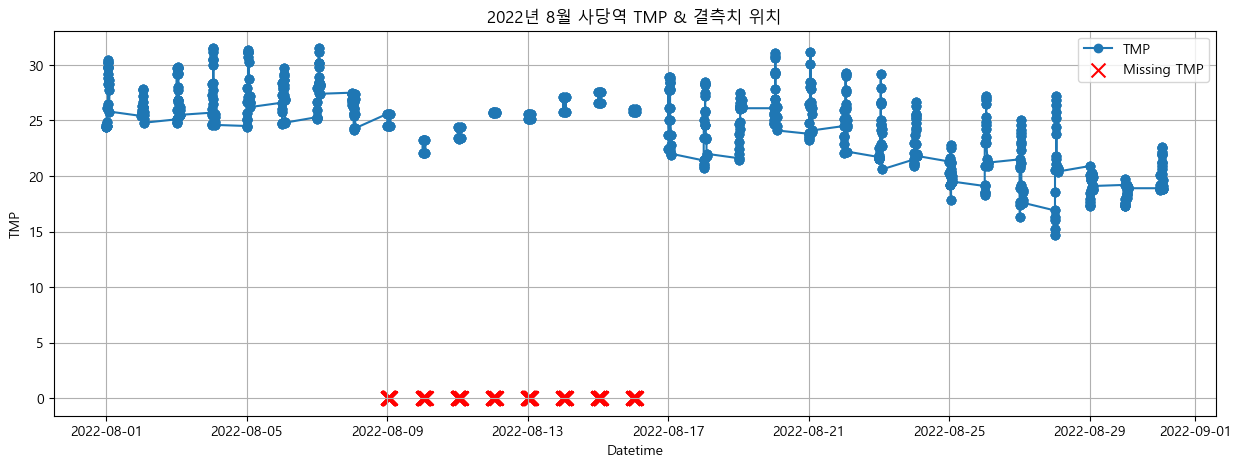

In [191]:
plt.figure(figsize=(15,5))
plt.plot(sadang_aug['datetime'], sadang_aug['TMP'], label='TMP', marker='o')

# 결측치는 빨간 점으로 표시
plt.scatter(
    sadang_aug.loc[sadang_aug['TMP_isna'], 'datetime'],
    [0]*sadang_aug['TMP_isna'].sum(),  # y=0에 표시
    color='red',
    label='Missing TMP',
    marker='x',
    s=100
)

plt.title('2022년 8월 사당역 TMP & 결측치 위치')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.legend()
plt.grid(True)
plt.show()


In [192]:
import matplotlib.pyplot as plt

# 사당역 & 기간 필터 (2022-08-05 ~ 2022-08-17)
mask = (
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'] >= '2022-08-05') &
    (df_tmp_cleaned['datetime'] <= '2022-08-17')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()


In [193]:
sadang_period['TMP_isna'] = sadang_period['TMP'].isna()

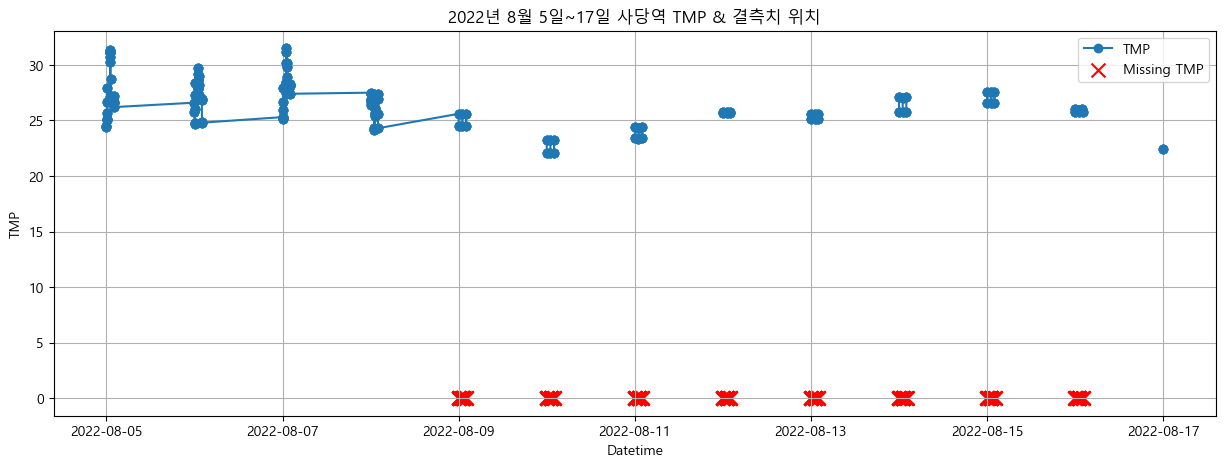

In [194]:
plt.figure(figsize=(15,5))
plt.plot(sadang_period['datetime'], sadang_period['TMP'], label='TMP', marker='o')

plt.scatter(
    sadang_period.loc[sadang_period['TMP_isna'], 'datetime'],
    [0]*sadang_period['TMP_isna'].sum(),
    color='red',
    label='Missing TMP',
    marker='x',
    s=100
)

plt.title('2022년 8월 5일~17일 사당역 TMP & 결측치 위치')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.legend()
plt.grid(True)
plt.show()


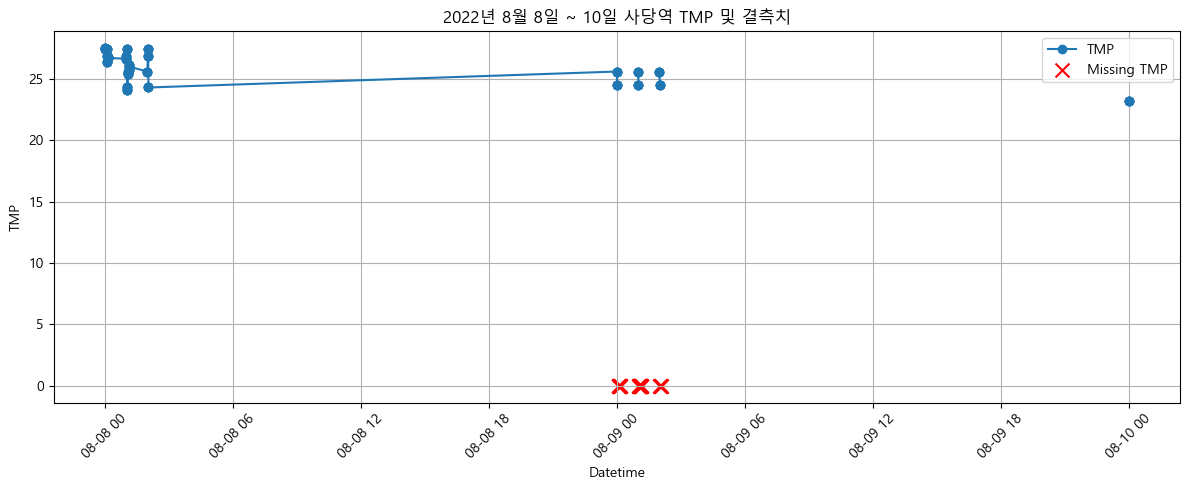

In [195]:
import matplotlib.pyplot as plt

# 날짜 범위와 역 필터링
mask = (
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'] >= '2022-08-08') &
    (df_tmp_cleaned['datetime'] <= '2022-08-10')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()

# 결측치 여부 컬럼 추가
sadang_period['TMP_isna'] = sadang_period['TMP'].isna()

# 시간순 정렬
sadang_period = sadang_period.sort_values(by='datetime')

# 그래프 그리기
plt.figure(figsize=(12,5))
plt.plot(sadang_period['datetime'], sadang_period['TMP'], marker='o', label='TMP')

# 결측치는 y=0에 빨간색 X 표시
plt.scatter(
    sadang_period.loc[sadang_period['TMP_isna'], 'datetime'],
    [0]*sadang_period['TMP_isna'].sum(),
    color='red',
    marker='x',
    s=100,
    label='Missing TMP'
)

plt.title('2022년 8월 8일 ~ 10일 사당역 TMP 및 결측치')
plt.xlabel('Datetime')
plt.ylabel('TMP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [196]:
mask = (
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['datetime'] >= '2022-08-08') &
    (df_tmp_cleaned['datetime'] <= '2022-08-10')
)
sadang_period = df_tmp_cleaned.loc[mask].copy()
sadang_period = sadang_period.sort_values(by='datetime')

In [197]:
for _, row in sadang_period.iterrows():
    dt_str = row['datetime'].strftime('%Y-%m-%d %H:%M')
    tmp_val = row['TMP']
    if pd.isna(tmp_val):
        tmp_val = '결측'
    print(f"{dt_str} : TMP = {tmp_val}")

2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:00 : TMP = 27.5
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:01 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:05 : TMP = 27.4
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:06 : TMP = 26.9
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:07 : TMP = 26.4
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:08 : TMP = 26.8
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 00:09 : TMP = 26.7
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:00 : TMP = 26.65
2022-08-08 01:01 : TMP = 26.9
2022-0

In [208]:
target_name = '사당'
target_direction = '상선'  # '상선', '하선', '내선', '외선' 중 하나
target_year = 2022
target_month = 8
target_day = 8
target_hour = 10

mask = (
    (df_tmp_cleaned['name'] == target_name) &
    (df_tmp_cleaned['direction'] == target_direction) &
    (df_tmp_cleaned['year'] == target_year) &
    (df_tmp_cleaned['month'] == target_month) &
    (df_tmp_cleaned['day'] == target_day) &
    (df_tmp_cleaned['hour'] == target_hour)
)

selected_rows = df_tmp_cleaned.loc[mask]

print(f"{target_year}-{target_month}-{target_day} {target_hour}시 {target_name}역 {target_direction} 데이터")
display(selected_rows)

2022-8-8 10시 사당역 상선 데이터


,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date


In [201]:
import pandas as pd

# 1. 사당역에서 TMP 결측치 필터
missing_sadang = df_tmp_cleaned[
    (df_tmp_cleaned['name'] == '사당') &
    (df_tmp_cleaned['TMP'].isna())
]

# 2. 날짜-시간별 결측치 개수 집계
missing_count = missing_sadang.groupby('datetime').size().reset_index(name='missing_count')

# 3. 정렬해서 출력
missing_count = missing_count.sort_values('datetime')

print("사당역 TMP 결측치가 있는 날짜/시간별 개수:")
for _, row in missing_count.iterrows():
    print(f"{row['datetime']} : {row['missing_count']}건")


사당역 TMP 결측치가 있는 날짜/시간별 개수:
2022-06-30 01:02:00 : 4건
2022-06-30 01:03:00 : 4건
2022-06-30 01:04:00 : 4건
2022-06-30 02:01:00 : 4건
2022-06-30 02:02:00 : 4건
2022-06-30 02:03:00 : 4건
2022-08-09 00:05:00 : 4건
2022-08-09 00:06:00 : 4건
2022-08-09 00:07:00 : 4건
2022-08-09 00:08:00 : 4건
2022-08-09 00:09:00 : 4건
2022-08-09 01:02:00 : 4건
2022-08-09 01:03:00 : 4건
2022-08-09 01:04:00 : 4건
2022-08-09 01:05:00 : 4건
2022-08-09 01:06:00 : 4건
2022-08-09 01:07:00 : 4건
2022-08-09 01:08:00 : 4건
2022-08-09 01:09:00 : 4건
2022-08-09 02:02:00 : 4건
2022-08-09 02:03:00 : 4건
2022-08-10 00:05:00 : 4건
2022-08-10 00:06:00 : 4건
2022-08-10 00:07:00 : 4건
2022-08-10 00:08:00 : 4건
2022-08-10 00:09:00 : 4건
2022-08-10 01:02:00 : 4건
2022-08-10 01:03:00 : 4건
2022-08-10 01:04:00 : 4건
2022-08-10 01:05:00 : 4건
2022-08-10 01:06:00 : 4건
2022-08-10 01:07:00 : 4건
2022-08-10 01:08:00 : 4건
2022-08-10 01:09:00 : 4건
2022-08-10 02:02:00 : 4건
2022-08-10 02:03:00 : 4건
2022-08-11 00:05:00 : 4건
2022-08-11 00:06:00 : 4건
2022-08-11 00:07:00 : 4

In [204]:
sadang_df = df_tmp_cleaned[df_tmp_cleaned['name'] == '사당'].copy()
sadang_df['date'] = sadang_df['datetime'].dt.date


In [205]:
agg = sadang_df.groupby('date').agg(
    missing_count = ('TMP', lambda x: x.isna().sum()),
    valid_count = ('TMP', lambda x: ((x.notna()) & (x != -99.0)).sum())
).reset_index()


In [206]:
dates_no_valid_tmp = agg[(agg['missing_count'] > 0) & (agg['valid_count'] == 0)]['date'].tolist()
print("결측치 포함, 유효값 없는 날짜:")
print(dates_no_valid_tmp)


결측치 포함, 유효값 없는 날짜:
[]


In [210]:
target_name = '사당'
target_direction = '상선'  # '상선', '하선', '내선', '외선' 중 하나
target_year = 2022
target_month = 8
target_day = 8
target_hour = 10

mask = (
    (df_tmp_cleaned['name'] == target_name) &
    (df_tmp_cleaned['direction'] == target_direction) &
    (df_tmp_cleaned['year'] == target_year) &
    (df_tmp_cleaned['month'] == target_month) &
    (df_tmp_cleaned['day'] == target_day) &
    (df_tmp_cleaned['hour'] == target_hour)
)

selected_rows = df_tmp_cleaned.loc[mask]

print(f"{target_year}-{target_month}-{target_day} {target_hour}시 {target_name}역 {target_direction} 데이터")
display(selected_rows)


2022-8-8 10시 사당역 상선 데이터


,datetime,tm,line,station_number,name,direction,stn,TMP,wd,WSD,...,PCP,REH,si,ta_chi,congestion,year,month,day,hour,date
